<a href="https://colab.research.google.com/github/yashraj01-se/Machine_learning_important_concepts/blob/main/Logistic_regression_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 1: Dataset and Visualization**

In [1]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

In [2]:
n_samples=1000
X,y=make_moons(n_samples=n_samples,
               shuffle=True,
               noise=0.03,
               random_state=42)
data=pd.DataFrame({"X1":X[:5,0],
                  "X2:":X[:5,1],
                  "label":y[:5]})
data.head()

,X1,X2:,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


In [3]:
def scatter_moon_plot(x1,x2):
  plt.figure(figsize=(10,6))
  plt.scatter(x1,x2,c=y,cmap=plt.cm.RdYlGn)
  plt.title("Scatter moon plot")
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.legend()

/tmp/ipython-input-3-760914392.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


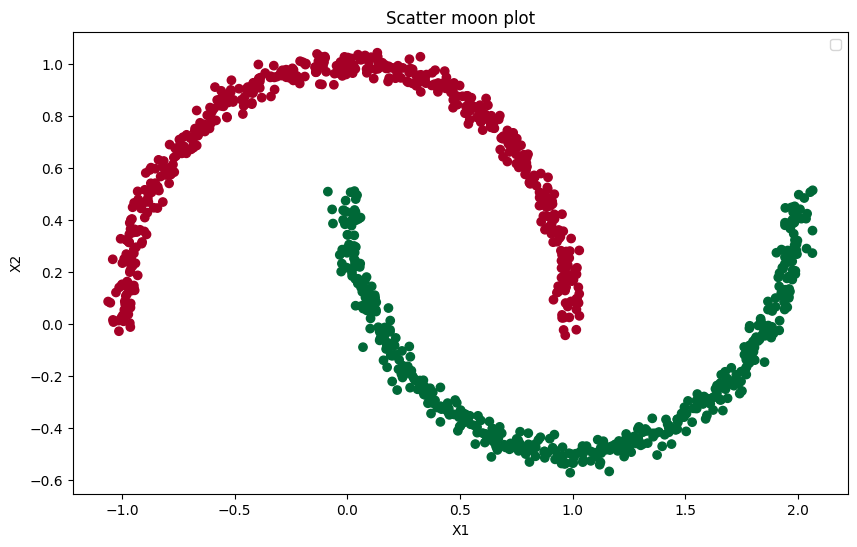

In [4]:
scatter_moon_plot(x1=X[:,0],x2=X[:,1])

#**Step 2 : changing numpy to tensor:**

In [5]:
print("Data type before: ",X.dtype,y.dtype)
print("Type before: ",type(X),type(y))
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
print("Data type before: ",X.dtype,y.dtype)
print("Type before: ",type(X),type(y))

Data type before:  float64 int64
Type before:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Data type before:  torch.float32 torch.float32
Type before:  <class 'torch.Tensor'> <class 'torch.Tensor'>


#**Step 3: Splitting data:**

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

800 200 800 200


#**step 4 : Creating the model**

In [19]:
torch.manual_seed(42)
class Logistic_regression(nn.Module):#output is raw logits
  def __init__(self,in_features):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,in_features))
    self.bias=nn.Parameter(torch.randn(1))

  def forward(self,x):
    z=torch.matmul(x,self.weights.T)+self.bias
    return z

In [20]:
model_1=Logistic_regression(in_features=2)
print(f"Parameters of the Model: {model_1.state_dict()}")

Parameters of the Model: OrderedDict([('weights', tensor([[0.3367, 0.1288]])), ('bias', tensor([0.2345]))])


#**step** **5**: **loss** **function**:

In [21]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),
                           lr=0.1)

#**Training and testing loop** /Accuracy function:

In [22]:
def accuracy(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100

  return acc

In [27]:
epoch_count=[]
train_loss_value=[]
test_loss_value=[]
def train_test_loop(epochs,model,X_train,X_test,Y_train,Y_test,loss_fn,optimizer,accuracy,epoch_count,train_loss_value,test_loss_value):
  for epoch in range(epochs):
    model.train()
    train_logits=model(X_train).squeeze()
    train_pred=torch.round(torch.sigmoid(train_logits))
    train_loss=loss_fn(train_pred,Y_train)
    train_acc=accuracy(Y_train,train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_logits=model(X_test).squeeze()
      test_pred=torch.round(torch.sigmoid(test_logits))
      test_loss=loss_fn(test_pred,Y_test)
      test_acc=accuracy(Y_test,test_pred)

    if epoch%10==0:
      epoch_count.append(epoch)
      test_loss_value.append(test_loss)
      train_loss_value.append(train_loss)
      print(f"Epoch :{epoch} , Training loss : {train_loss:.2f} , Trianing Accuracy : {train_acc:.2f} , Testing loss : {test_loss:.2f} , Testing Accuracy : {test_acc:.2f}")


In [28]:
train_test_loop(epochs=500,
                model=model_1,
                X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test,
                loss_fn=loss_fn,optimizer=optimizer,accuracy=accuracy,
                epoch_count=epoch_count,train_loss_value=train_loss_value,test_loss_value=test_loss_value)

Epoch :0 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :10 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :20 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :30 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :40 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :50 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :60 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :70 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :80 , Training loss : 0.76 , Trianing Accuracy : 57.88 , Testing loss : 0.76 , Testing Accuracy : 58.00
Epoch :90 ,

In [29]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary


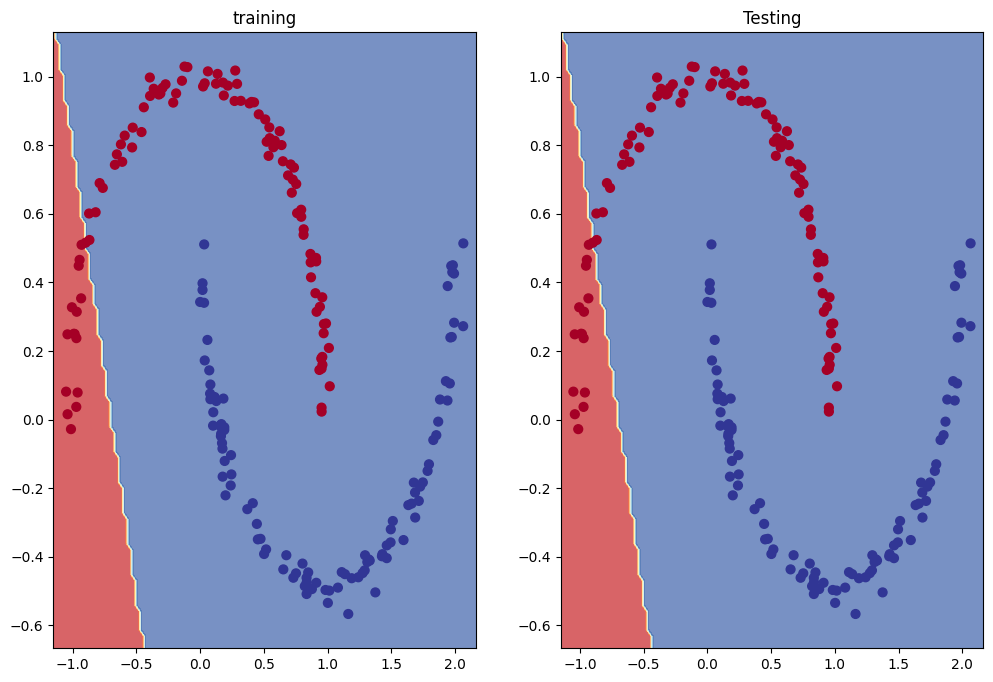

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("training")
plot_decision_boundary(model_1,X_test,Y_test)
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_1,X_test,Y_test)